In [1]:
# Import necessary libraries
import pandas as pd 

In [2]:
# Load your dataset (replace 'train.csv' with your actual file path)
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
# Check the first few rows and data types
print(data.head())
print(data.dtypes)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [3]:
# Select categorical features (usually of type 'object' or 'category')
categorical_features = data.select_dtypes(include=['object', 'category']).columns

# Count the number of categorical features
num_categorical_features = len(categorical_features)

print(f"Number of categorical features: {num_categorical_features}")

Number of categorical features: 43


In [4]:
# Check for missing values
print(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


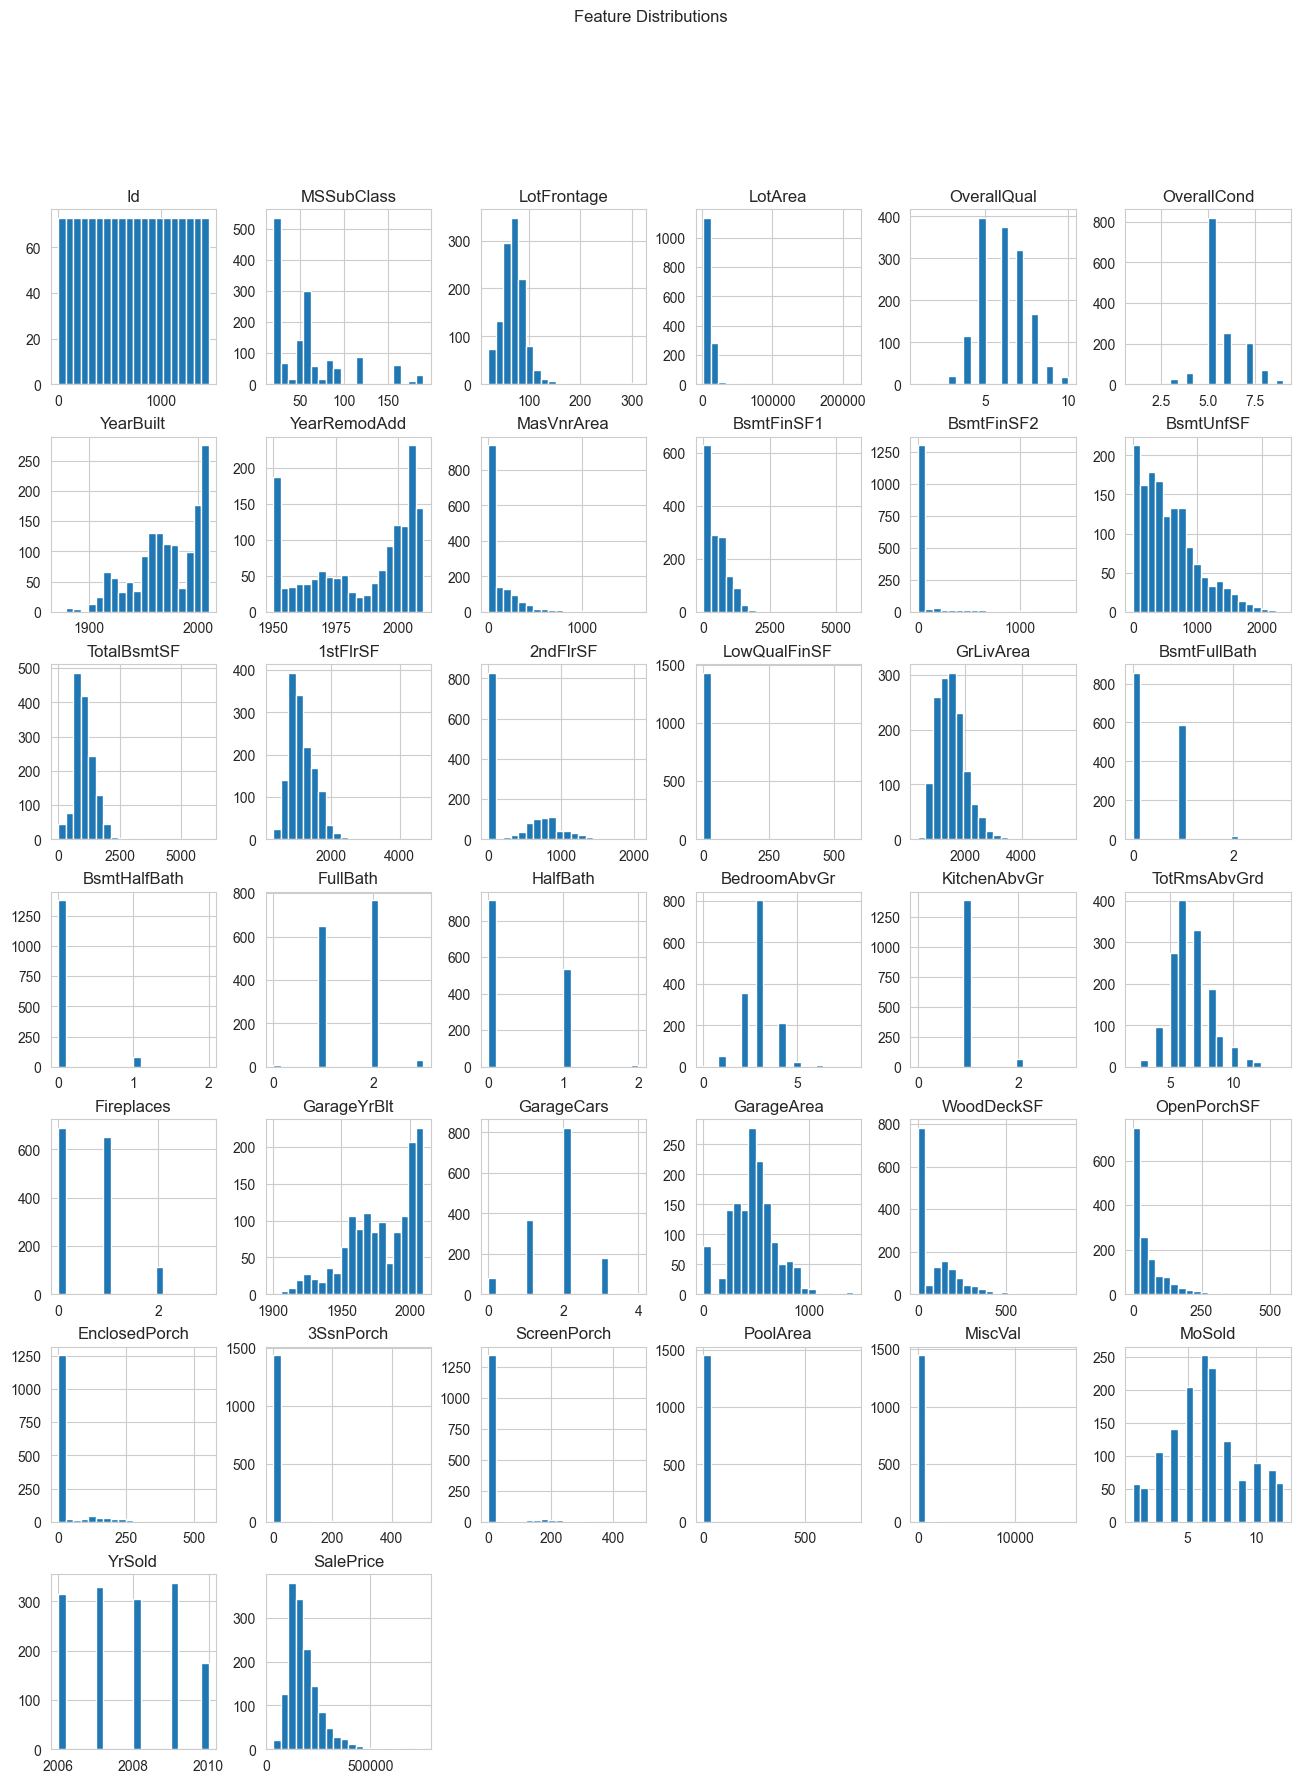

In [7]:
### 2. Feature Distribution
import matplotlib.pyplot as plt
# Histogram for numeric features
data.select_dtypes(include=['float64', 'int64','object']).hist(figsize=(16, 20), bins=20)
plt.suptitle('Feature Distributions')
plt.show()

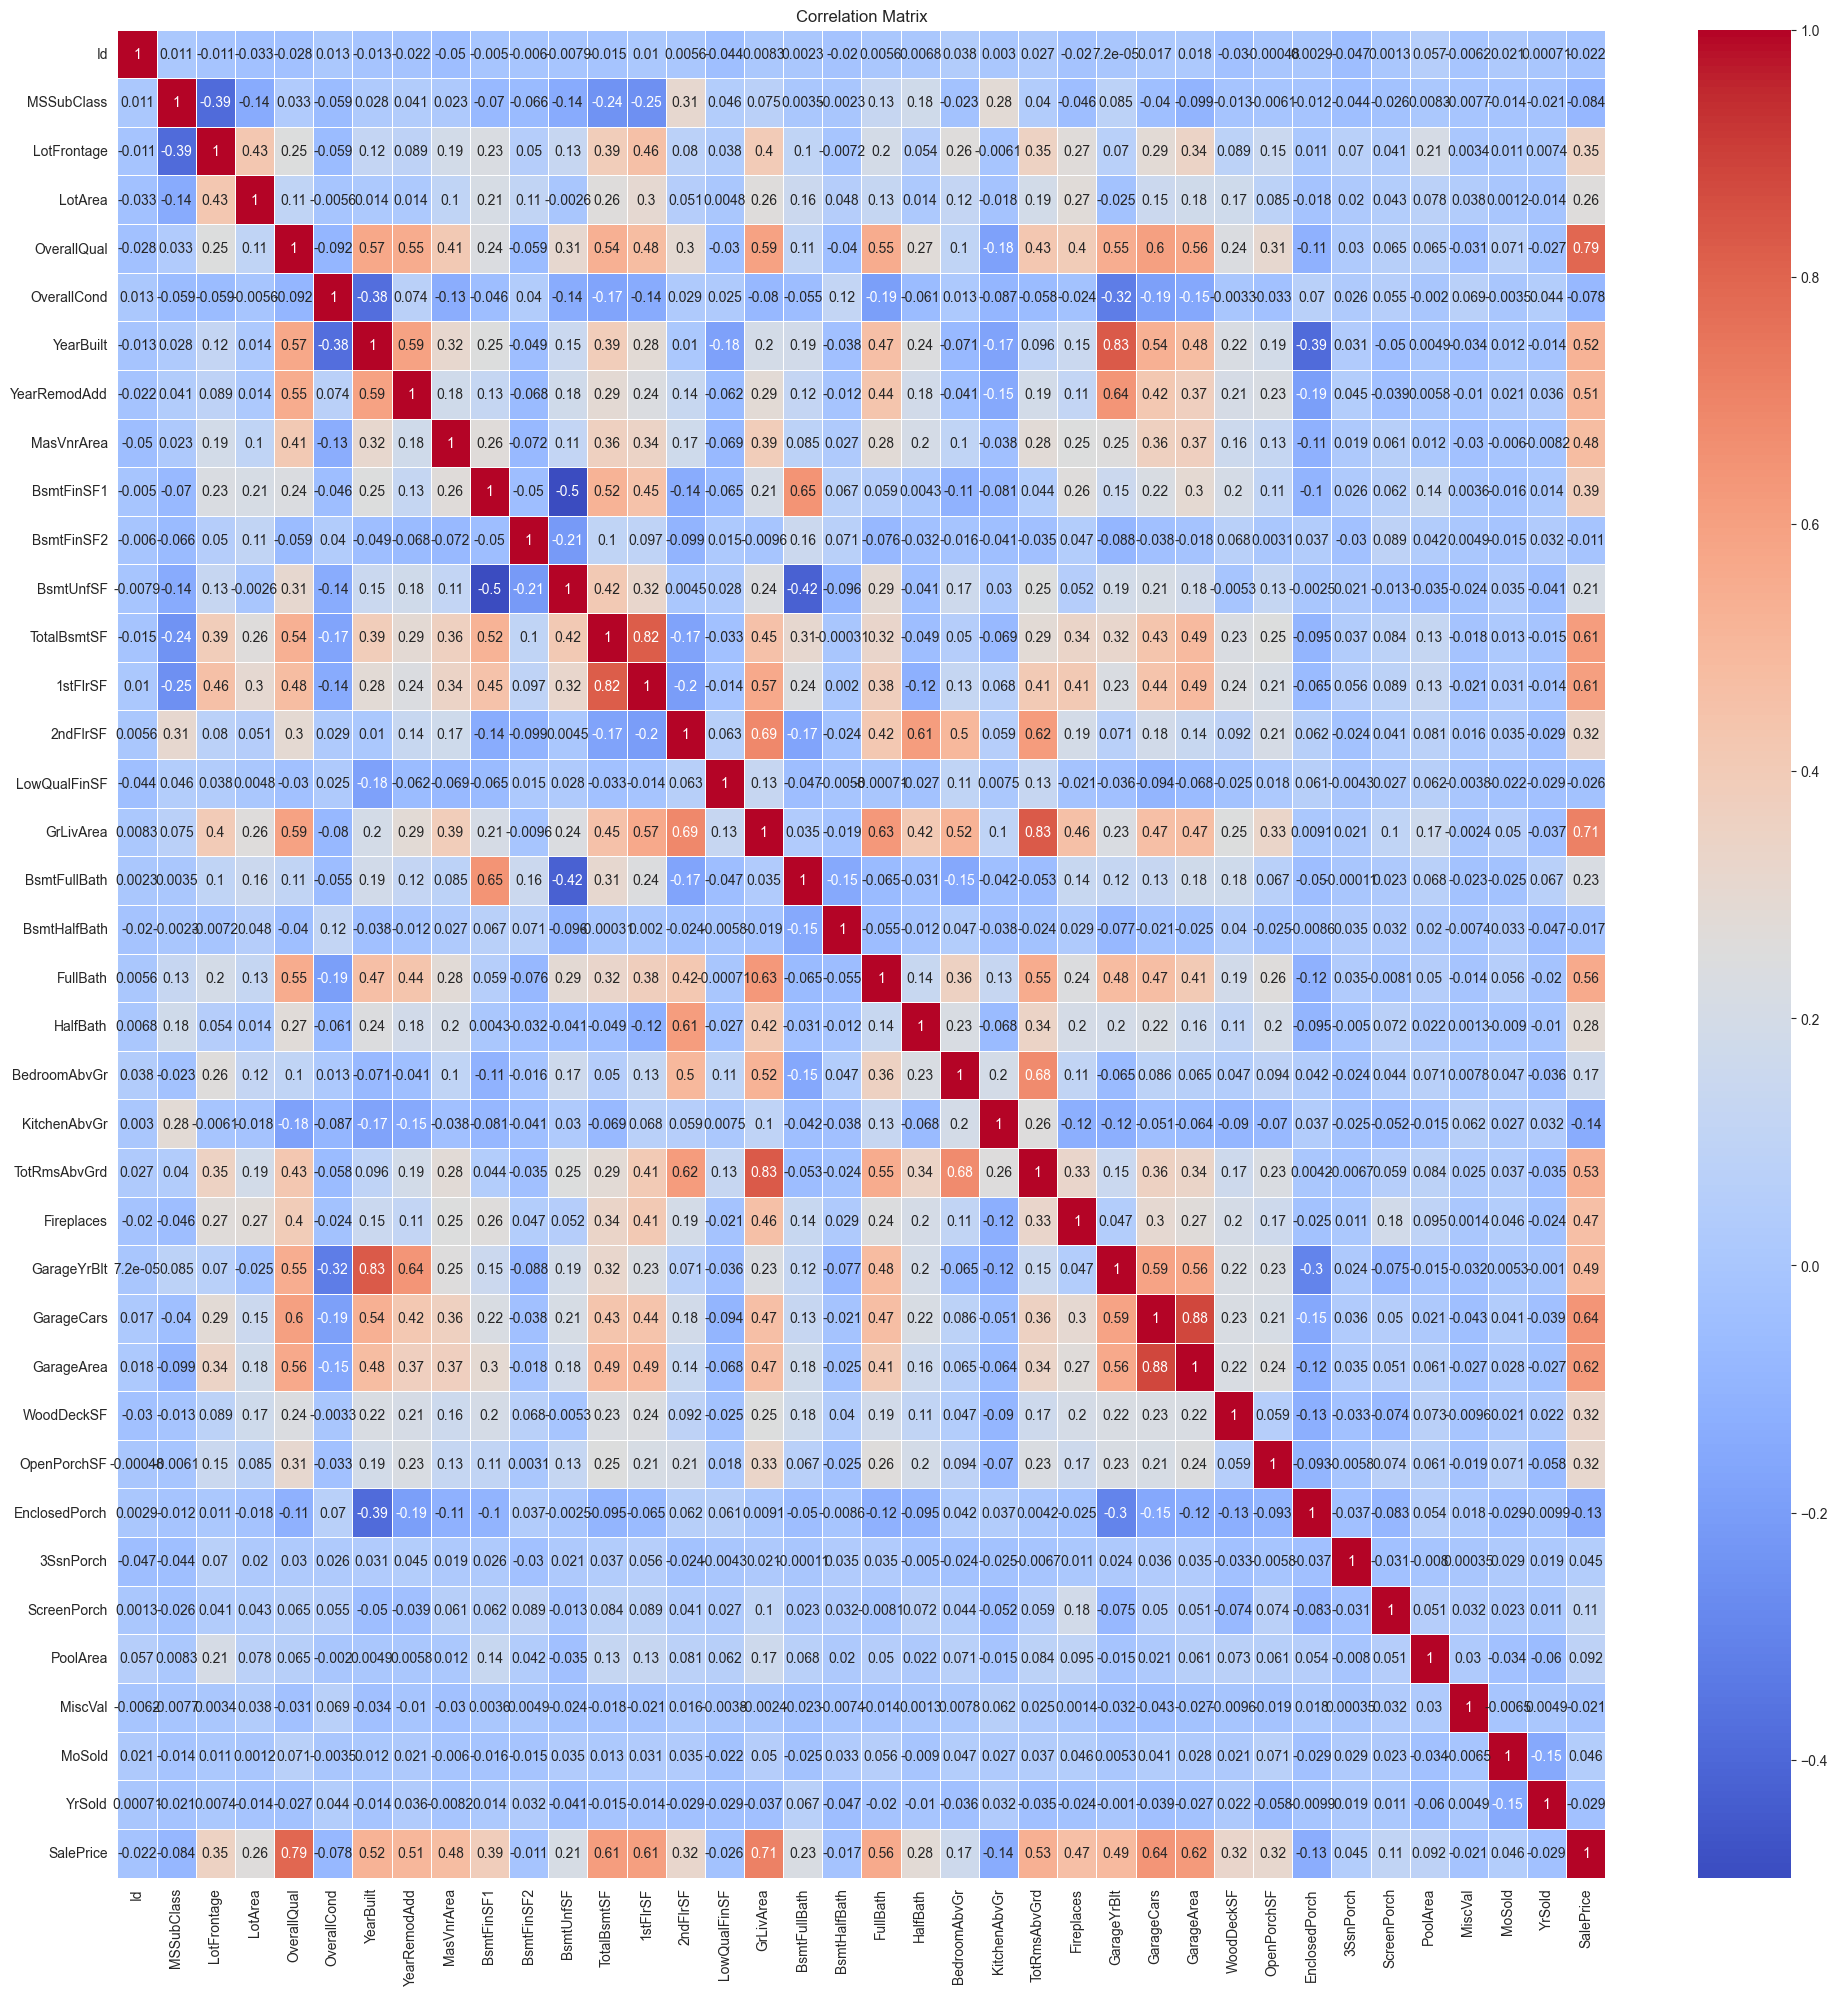

In [8]:
# Correlation matrix for numeric features
import seaborn as sns
plt.figure(figsize=(24,24))
corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Check for missing values and display only the features with missing values
missing_data = data.isnull().sum()

# Filter out features without missing values and sort by the number of missing entries
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Print the results
print(missing_data)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [10]:
#data1=data.drop(columns=['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','LotFrontage'])

In [11]:
from sklearn.preprocessing import LabelEncoder

#Create a copy of your dataset
train_data_encoded = data.copy()

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to all categorical columns
for col in train_data_encoded.select_dtypes(include=['object']).columns:
    train_data_encoded[col] = le.fit_transform(train_data_encoded[col])

# Now, print the columns of the encoded data
print(train_data_encoded.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
#import pandas as pd

# One-Hot Encoding of categorical variables in the training data
#train_data_encoded = pd.get_dummies(data, drop_first=True)

#print(train_data_encoded.columns)


In [13]:
train_data_encoded.fillna(train_data_encoded.mean(), inplace=True)

In [14]:
# Separate features and target
X_train = train_data_encoded.drop(columns=['SalePrice','Id'])  # Features
y_train = train_data_encoded['SalePrice']  # Target variable

In [15]:
#test_data1 = test_data.drop(columns=['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','LotFrontage'])

In [16]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of your dataset
test_data_encoded = test_data.copy()

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to all categorical columns
for col in test_data_encoded.select_dtypes(include=['object']).columns:
    test_data_encoded[col] = le.fit_transform(test_data_encoded[col])

# Now, print the columns of the encoded data
print(test_data_encoded.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [17]:
test_data_encoded.fillna(test_data_encoded.mean(), inplace=True)

In [18]:
# Separate features and target
# One-Hot Encoding of the test data using the same columns as training data
#test_data_encoded = pd.get_dummies(test_data, drop_first=True)

#test_data_encoded.fillna(test_data_encoded.mean(), inplace=True)



In [19]:
from sklearn.preprocessing import StandardScaler
testdata = test_data_encoded.copy()
# Encode or preprocess test_data_encoded if needed (depending on how you handled the train data)
X_test = testdata.drop(columns=['Id'])  # Dropping 'Id' for scaling and model input

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean (you can choose 'median' or another strategy)
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)


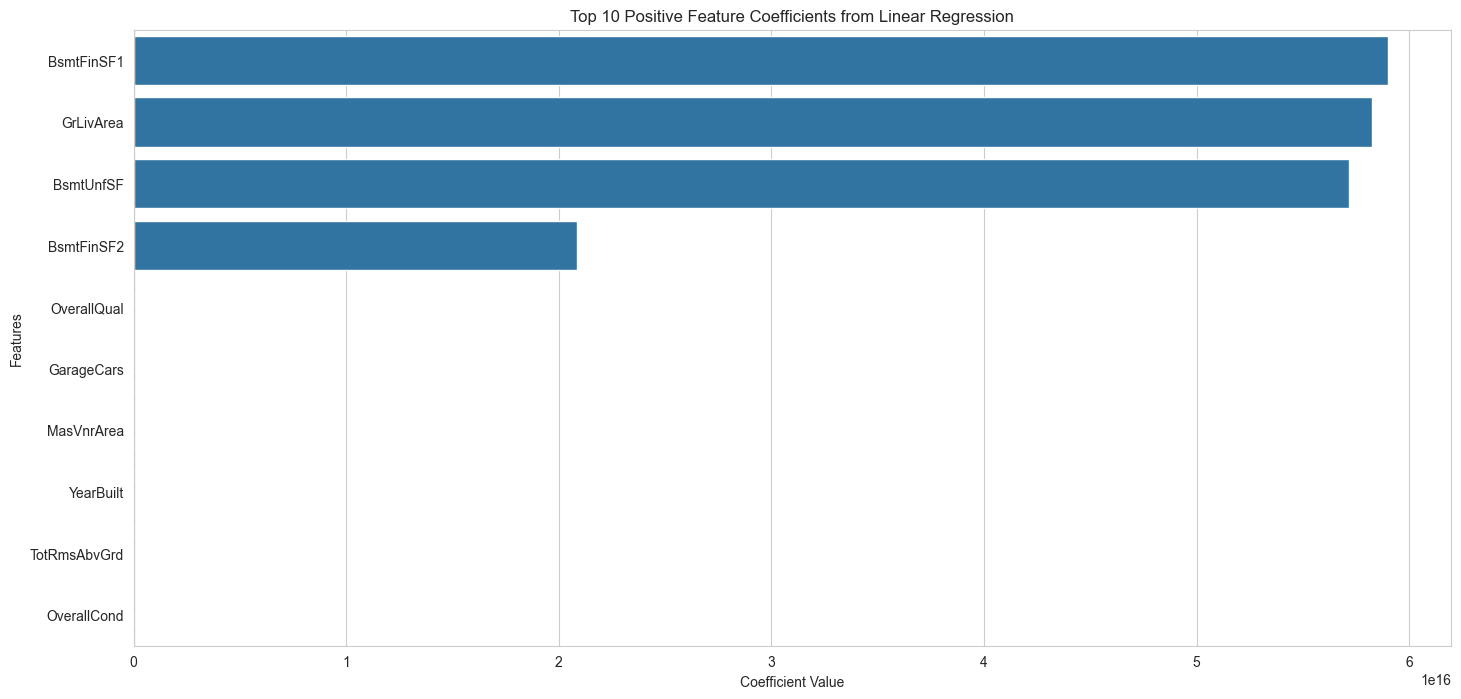

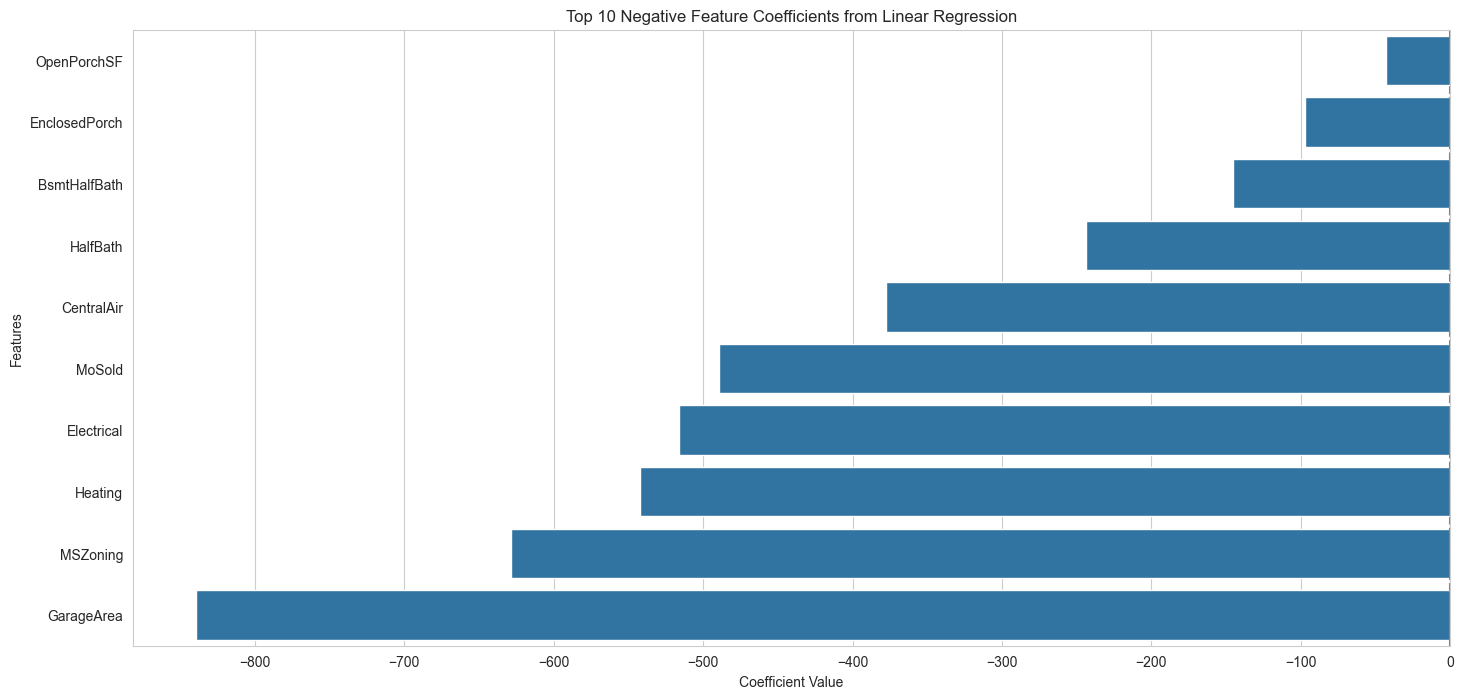

In [21]:
# Train a Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Get feature coefficients
coefficients = pd.Series(model.coef_, index=X_train.columns).sort_values(ascending=False)

# Filter positive and negative coefficients
positive_coefficients = coefficients[coefficients > 0]
negative_coefficients = coefficients[coefficients < 0]

# Select top 10 positive coefficients
top_positive = positive_coefficients.head(10)

# Select top 10 negative coefficients
top_negative = negative_coefficients.head(10)

# Plot top 10 positive coefficients
plt.figure(figsize=(17, 8))
plt.title("Top 10 Positive Feature Coefficients from Linear Regression")
sns.barplot(y=top_positive.index, x=top_positive.values, orient='h')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.axvline(0, color='gray', linestyle='--')  # Optional: add a line at x=0
plt.show()

# Plot top 10 negative coefficients
plt.figure(figsize=(17, 8))
plt.title("Top 10 Negative Feature Coefficients from Linear Regression")
sns.barplot(y=top_negative.index, x=top_negative.values, orient='h')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.axvline(0, color='gray', linestyle='--')  # Optional: add a line at x=0
plt.show()

In [23]:
# Load the actual sale prices from the sample submission
submission_data = pd.read_csv('sample_submission.csv')


In [26]:
# Initialize the Gradient Boosting Regressor
gbr = RandomForestRegressor(n_estimators=200, max_depth=3, random_state=42)

# Train the model on the training data
gbr.fit(X_train_scaled, y_train)

y_pred = gbr.predict(X_test_scaled)
# Create a new DataFrame with 'Id' and the predicted values
predictions_df = pd.DataFrame({
    'Id': test_data['Id'],  # The 'Id' column from the test data
    'PredictedSalePrice': y_pred  # The predicted values from the model
})

# Save the DataFrame to a new CSV file
predictions_df.to_csv('predictions_output.csv', index=False) 

In [27]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# Load the sample submission data (which contains the actual SalePrice)
sample_submission = pd.read_csv('sample_submission.csv')

# Load the predictions CSV file (which contains the predicted SalePrice)
predictions = pd.read_csv('predictions_output.csv')

# Merge the two dataframes on 'Id' to have actual and predicted SalePrice in the same dataframe
merged_df = pd.merge(sample_submission, predictions, on='Id', how='inner')

# Initialize a list to store individual RMSE values
rmse_list = []
# Loop through the merged dataframe to calculate individual RMSE
for index, row in merged_df.iterrows():
    actual_price = row['SalePrice']  # Actual SalePrice from sample_submission
    predicted_price = row['PredictedSalePrice']  # Predicted SalePrice from predictions_output
    
    # Calculate individual RMSE (error for each prediction)
    individual_rmse = np.sqrt((actual_price - predicted_price) ** 2)

    # Add individual RMSE to the list
    rmse_list.append(individual_rmse)
    

mean_rmse = np.sum(rmse_list) / len(rmse_list)

# Print the mean RMSE
print(f"Mean RMSE: {mean_rmse:.4f}")



Mean RMSE: 48767.0391


In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

# Load the sample submission data (which contains the actual SalePrice)
sample_submission = pd.read_csv('sample_submission.csv')

# Load the predictions CSV file (which contains the predicted SalePrice)
predictions = pd.read_csv('predictions_output.csv')

# Merge the two dataframes on 'Id' to have actual and predicted SalePrice in the same dataframe
merged_df = pd.merge(sample_submission, predictions, on='Id', how='inner')

# Calculate the overall MAE
overall_mae = mean_absolute_error(merged_df['SalePrice'], merged_df['PredictedSalePrice'])

# Calculate the overall R-squared using the entire dataset
overall_r_squared = r2_score(merged_df['SalePrice'], merged_df['PredictedSalePrice'])

# Initialize a list for individual MAE
individual_mae_list = []

# Loop through the merged dataframe to calculate individual MAE
for index, row in merged_df.iterrows():
    actual_price = row['SalePrice']  # Actual SalePrice from sample_submission
    predicted_price = row['PredictedSalePrice']  # Predicted SalePrice from predictions_output
    
    # Calculate individual MAE (absolute error for each prediction)
    individual_mae = abs(actual_price - predicted_price)
    individual_mae_list.append(individual_mae)

# Calculate mean of individual MAE
mean_individual_mae = np.mean(individual_mae_list)

# Print the metrics
print(f"Overall MAE: {overall_mae:.4f}")
print(f"Mean Individual MAE: {mean_individual_mae:.4f}")


Overall MAE: 48767.0391
Mean Individual MAE: 48767.0391


In [29]:
# Print the first few actual and predicted values
print(merged_df[['SalePrice', 'PredictedSalePrice']].head(10))


       SalePrice  PredictedSalePrice
0  169277.052498       122723.795111
1  187758.393989       140180.026883
2  183583.683570       163505.335502
3  179317.477511       170467.395172
4  150730.079977       246589.785083
5  177150.989247       169914.188901
6  172070.659229       139526.082313
7  175110.956520       167122.008035
8  162011.698832       185326.765576
9  160726.247831       123988.099496


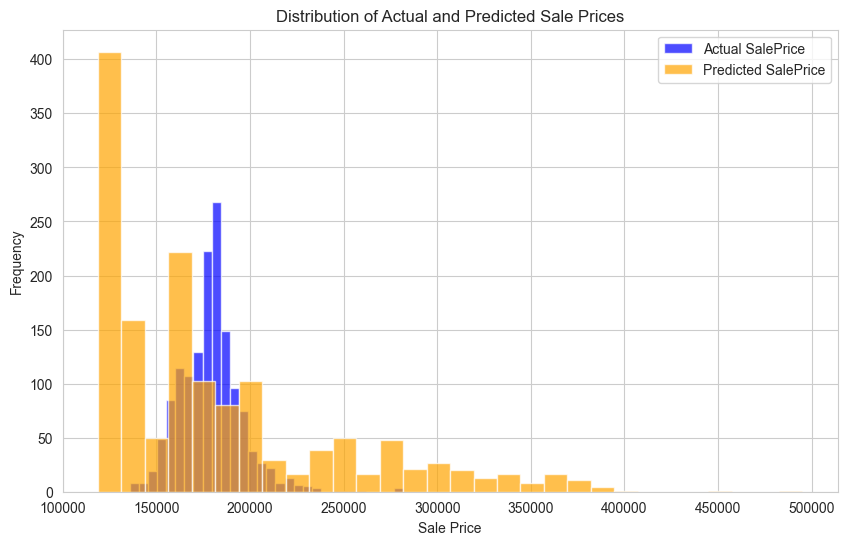

In [30]:
import matplotlib.pyplot as plt

# Plot distribution of actual SalePrice
plt.figure(figsize=(10, 6))
plt.hist(merged_df['SalePrice'], bins=30, alpha=0.7, color='blue', label='Actual SalePrice')
plt.hist(merged_df['PredictedSalePrice'], bins=30, alpha=0.7, color='orange', label='Predicted SalePrice')
plt.title('Distribution of Actual and Predicted Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [31]:
# Fill missing values in categorical columns with the mode
for col in test_data_encoded.select_dtypes(include=['object']).columns:
    test_data_encoded[col].fillna(test_data_encoded[col].mode()[0], inplace=True)

# Fill missing values in numerical columns with the mean
test_data_encoded.fillna(test_data_encoded.mean(), inplace=True)


In [32]:
# Calculate metrics
overall_mae = mean_absolute_error(merged_df['SalePrice'], merged_df['PredictedSalePrice'])
overall_r_squared = r2_score(merged_df['SalePrice'], merged_df['PredictedSalePrice'])

print(f"Overall MAE: {overall_mae:.4f}")


Overall MAE: 48767.0391


In [34]:
# Set a threshold for filtering
import numpy as np
threshold = 0.2  # Adjust this threshold based on your analysis

# Identify influential features
influential_features = coefficients[np.abs(coefficients) > threshold].index

# Filter the dataset to keep only influential features
X_train_influential = X_train[influential_features]
X_test_influential = X_test[influential_features]

# Show remaining features
print("Remaining Influential Features:")
print(X_train_influential.columns)
# Create and train the Gradient Boosting Regressor model
from sklearn.ensemble import RandomForestRegressor

# Initialize the Gradient Boosting Regressor
gbr = RandomForestRegressor(n_estimators=200, max_depth=3, random_state=42)

# Train the model on the training data
gbr.fit(X_train_influential, y_train)

y_pred1 = gbr.predict(X_test_influential)
# Create a new DataFrame with 'Id' and the predicted values
predictions_df1 = pd.DataFrame({
    'Id': test_data['Id'],  # The 'Id' column from the test data
    'PredictedSalePrice': y_pred1  # The predicted values from the model
})

# Save the DataFrame to a new CSV file
predictions_df1.to_csv('predictions_output1.csv', index=False) 

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# Load the sample submission data (which contains the actual SalePrice)
sample_submission = pd.read_csv('sample_submission.csv')

# Load the predictions CSV file (which contains the predicted SalePrice)
predictions1 = pd.read_csv('predictions_output1.csv')

# Merge the two dataframes on 'Id' to have actual and predicted SalePrice in the same dataframe
merged_df1 = pd.merge(sample_submission, predictions1, on='Id', how='inner')

# Initialize a list to store individual RMSE values
rmse_list = []
# Loop through the merged dataframe to calculate individual RMSE
for index, row in merged_df1.iterrows():
    actual_price = row['SalePrice']  # Actual SalePrice from sample_submission
    predicted_price = row['PredictedSalePrice']  # Predicted SalePrice from predictions_output
    
    # Calculate individual RMSE (error for each prediction)
    individual_rmse = np.sqrt((actual_price - predicted_price) ** 2)

    # Add individual RMSE to the list
    rmse_list.append(individual_rmse)
    

mean_rmse = np.sum(rmse_list) / len(rmse_list)

# Print the mean RMSE
print(f"Mean RMSE: {mean_rmse:.4f}")



Remaining Influential Features:
Index(['BsmtFinSF1', 'GrLivArea', 'BsmtUnfSF', 'BsmtFinSF2', 'OverallQual',
       'GarageCars', 'MasVnrArea', 'YearBuilt', 'TotRmsAbvGrd', 'OverallCond',
       'MasVnrType', 'LotArea', 'Functional', 'BsmtFullBath', 'SaleCondition',
       'RoofMatl', 'WoodDeckSF', 'ScreenPorch', 'Neighborhood', 'LandContour',
       'FullBath', 'Fireplaces', 'Exterior2nd', 'Alley', 'Street', 'BsmtCond',
       'GarageType', 'RoofStyle', 'GarageCond', 'LandSlope', 'BsmtFinType2',
       '3SsnPorch', 'MiscFeature', 'Foundation', 'ExterCond', 'PavedDrive',
       'YearRemodAdd', 'GarageQual', 'MiscVal', 'Fence', 'LotConfig',
       'GarageFinish', 'OpenPorchSF', 'EnclosedPorch', 'BsmtHalfBath',
       'HalfBath', 'CentralAir', 'MoSold', 'Electrical', 'Heating', 'MSZoning',
       'GarageArea', 'Condition1', 'BsmtFinType1', 'GarageYrBlt', 'SaleType',
       'YrSold', 'LotShape', 'HeatingQC', 'Utilities', 'HouseStyle',
       'FireplaceQu', 'Condition2', 'BedroomAbvGr', 'Ki

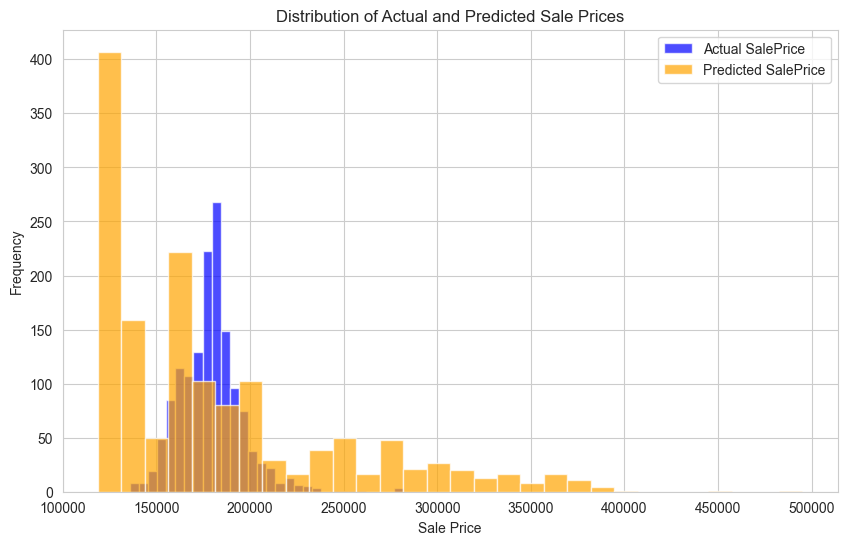

In [35]:
import matplotlib.pyplot as plt

# Plot distribution of actual SalePrice
plt.figure(figsize=(10, 6))
plt.hist(merged_df['SalePrice'], bins=30, alpha=0.7, color='blue', label='Actual SalePrice')
plt.hist(merged_df['PredictedSalePrice'], bins=30, alpha=0.7, color='orange', label='Predicted SalePrice')
plt.title('Distribution of Actual and Predicted Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()
